In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('ggplot')

In [4]:
diabetes = pd.read_csv("../data/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Doesn't make sense that the following columns have 0 values:

*    Glucose
*    BloodPressure
*    SkinThickness
*    Insulin
*    BMI


In [7]:
diabetes2 = diabetes.copy(deep = True)
diabetes2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f77f86fa0>,
      dtype=object)

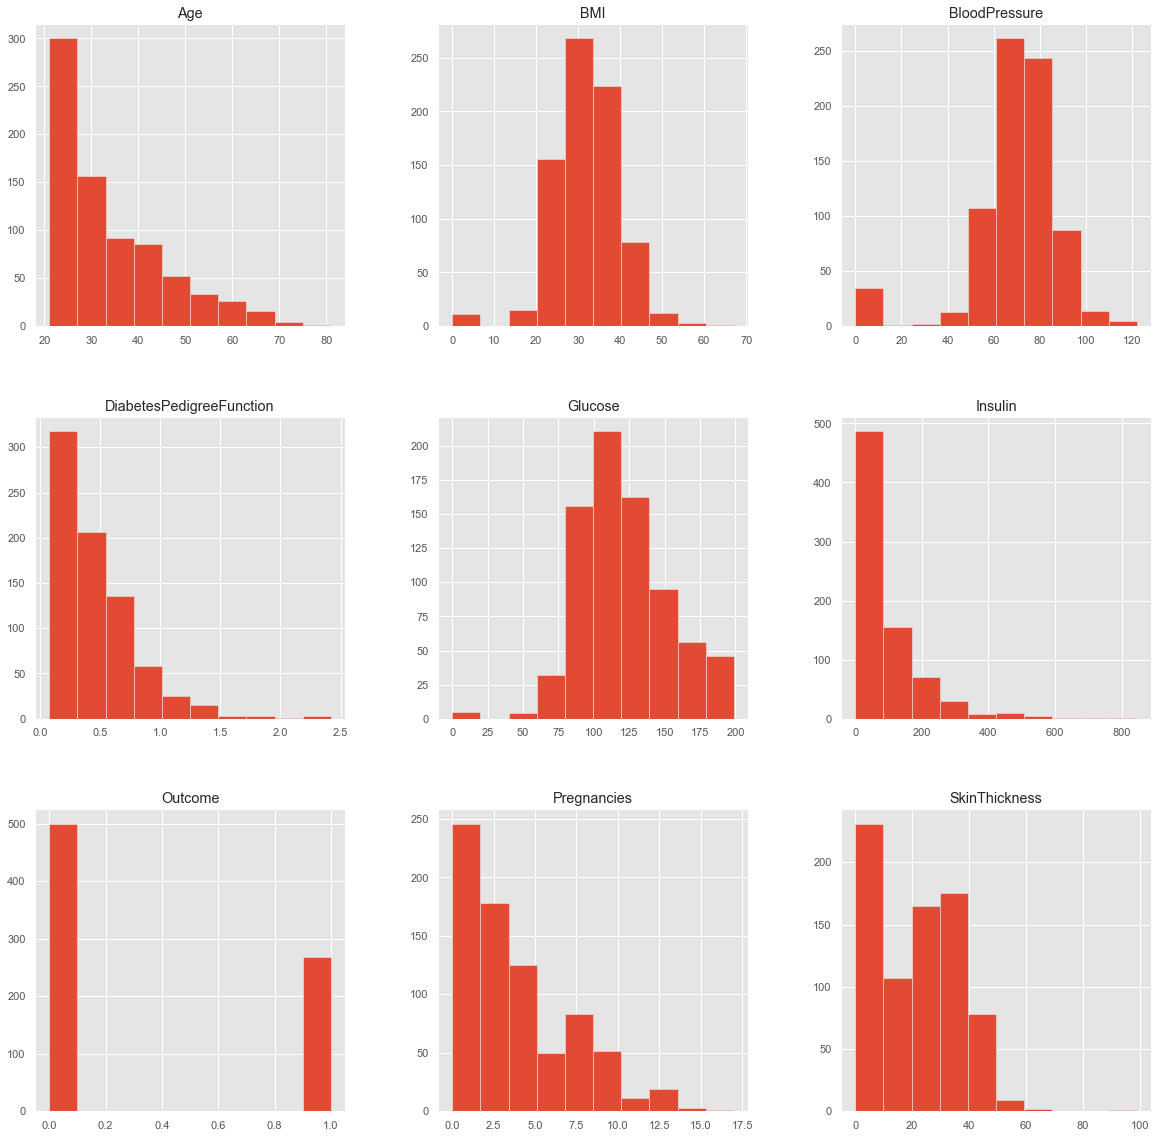

In [9]:
diabetes.hist(figsize = (20,20))

In [10]:
diabetes2['Glucose'].fillna(diabetes2['Glucose'].mean(), inplace = True)
diabetes2['BloodPressure'].fillna(diabetes2['BloodPressure'].mean(), inplace = True)
diabetes2['SkinThickness'].fillna(diabetes2['SkinThickness'].median(), inplace = True)
diabetes2['Insulin'].fillna(diabetes2['Insulin'].median(), inplace = True)
diabetes2['BMI'].fillna(diabetes2['BMI'].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f7593bb50>,
      dtype=object)

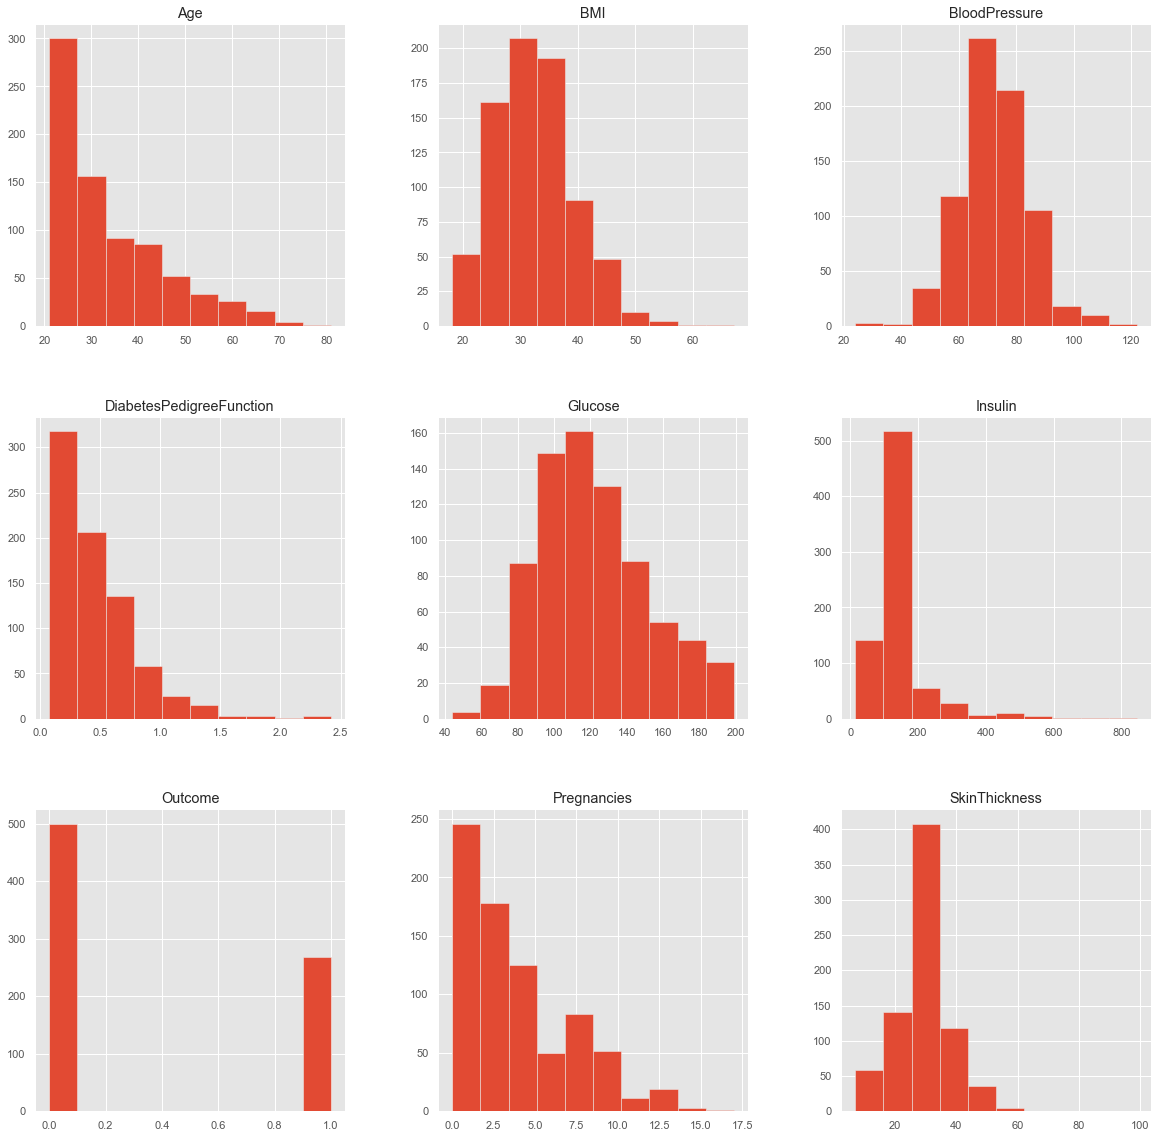

In [12]:
diabetes2.hist(figsize = (20,20))

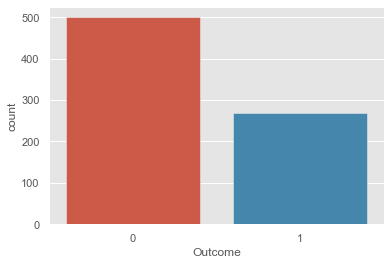

In [15]:
sns.countplot(x='Outcome', data=diabetes)
plt.show()

More non-diabetics than diabetics

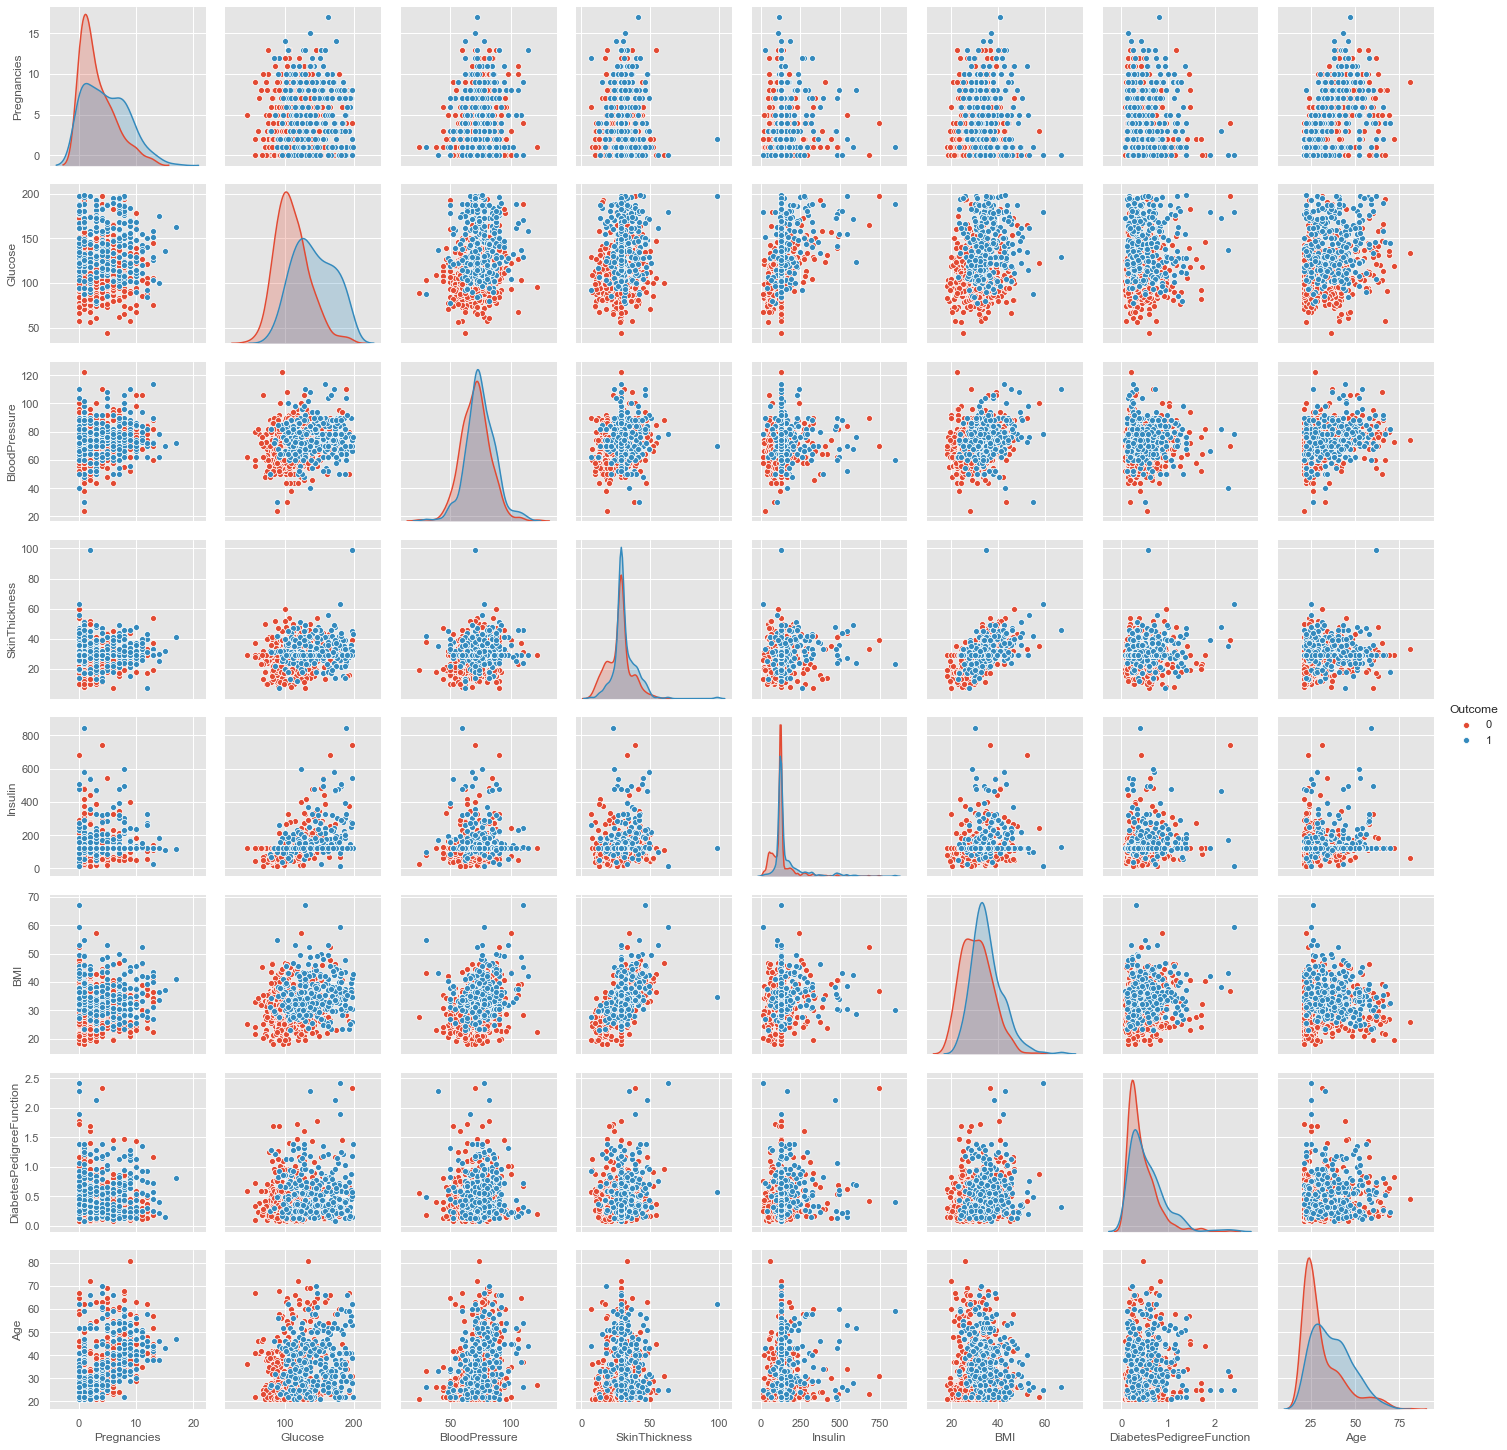

In [20]:
sns.pairplot(diabetes2, hue = 'Outcome')

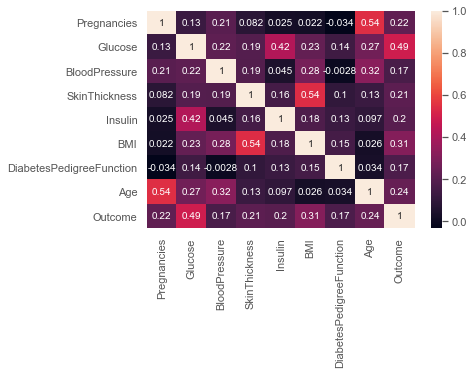

In [23]:
sns.heatmap(diabetes2.corr(), annot=True)

In [25]:
X = diabetes2.iloc[:, :-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [26]:
y = diabetes2.iloc[:, -1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), 
                 columns=list(diabetes2.iloc[:, :-1]))
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, stratify=y)

In [33]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [37]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

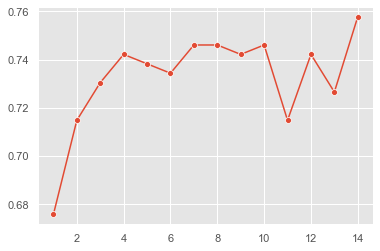

In [44]:
sns.lineplot(range(1,15),test_scores,marker='o')

In [38]:
print(f'Max test score {max_test_score}% and k = {test_scores_ind}')

Max test score 0.7578125% and k = [13]


In [48]:
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

y_pred = knn.predict(X_test)

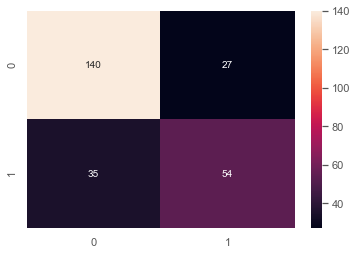

In [51]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(confusion), annot=True, fmt='g')

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       167
           1       0.67      0.61      0.64        89

    accuracy                           0.76       256
   macro avg       0.73      0.72      0.73       256
weighted avg       0.75      0.76      0.75       256



In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

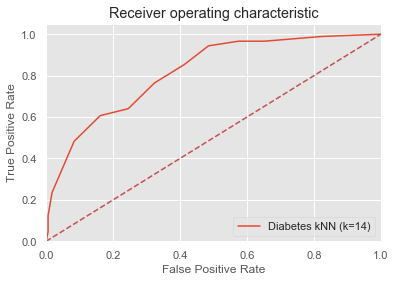

In [55]:
plt.figure()
plt.plot(fpr, tpr, label='Diabetes kNN (k=14)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()